In [1]:
from openalea.mtg import *
import numpy as np
from importlib import reload
import mangoG3; reload(mangoG3)
from mangoG3 import *

g = get_G3_mtg()

In [2]:
from matplotlib.pyplot import *
import mtgplot as mp

In [3]:
sw = mp.plot_tree(g)
sw

SceneWidget(scenes=[{'id': 'AyjoJD6OKdKtzCfJhzgv6mmeA', 'data': b'x\xda\x9c]\t|T\xd5\xd5\x1fv\x1cY\x04"\xbb\x8…

In [3]:
import pruning ; reload(pruning)
from pruning import *

In [4]:
pruned = prune(g, 100)

In [5]:
intensity = continuous_intensity_from_pruned(pruned)
print(intensity, intensity_level(intensity))

0.31742056159978227 T2


In [6]:
import gapfraction; reload(gapfraction)
from gapfraction import *

In [9]:
img = hemispherical_view(g)
imshow(img)

ArgumentError: Python argument types in
    ZBufferEngine.__init__(ZBufferEngine, int, int, eRenderingStyle, Color3)
did not match C++ signature:
    __init__(struct _object * __ptr64, unsigned short imageWidth=800, unsigned short imageHeight=600, unsigned int defaultId=4294967295, enum PGL::Color4::eColor4Format conversionformat=openalea.plantgl.scenegraph._pglsg.eColor4Format.eARGB)
    __init__(struct _object * __ptr64, unsigned short imageWidth=800, unsigned short imageHeight=600, class PGL::Color4 defaultColor=Color4(255,255,255,255), enum PGL::ZBufferEngine::eRenderingStyle renderingStyle=openalea.plantgl.algo._pglalgo.eRenderingStyle.eIdBased)
    __init__(struct _object * __ptr64, unsigned short imageWidth=800, unsigned short imageHeight=600, class PGL::Color3 backGroundColor=Color3(0,0,0), enum PGL::ZBufferEngine::eRenderingStyle renderingStyle=openalea.plantgl.algo._pglalgo.eRenderingStyle.eColorBased)

In [9]:
gf = gap_fraction(g, camheight = 120)
print(gf)

0.10448295617301633


In [10]:
gf = gap_fraction(pruned, camheight = 120)
print(gf)

0.15232025207676883


In [9]:
import lightestimation; reload(lightestimation)
from lightestimation import *

In [10]:
TrPPFD_mean, TrPPFD_min, Zeta_mean, Zeta_min, Zeta_8H = light_variables_regrowth(pruned)

(array([ 11.,  28.,  52., 132., 233., 386., 595., 712., 818., 952.]),
 array([0.37843079, 0.45098212, 0.52353345, 0.59608478, 0.66863612,
        0.74118745, 0.81373878, 0.88629011, 0.95884145, 1.03139278,
        1.10394411]),
 <BarContainer object of 10 artists>)

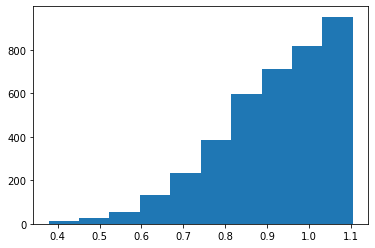

In [80]:
hist(Zeta_mean)


In [23]:
#def Death_pruned_2022(diameter, intensity, severity, Zeta_min):
#    if np.isnan(Zeta_min):
#        Zeta_min = 0
#    intercept = 0.888 
#    Coef_severity = { n1 : 0.091, 
#                      n2 : 0.198,
#                      n3 : 0.232 }
#    linear = intercept + (-0.227) * diameter + 2.324 * intensity + (-2.697) * Zeta_min + Coef_severity[severity] 
#    probavalue = exp(linear)/(1+exp(linear))

#    return binomial_realization(probavalue)

#def Death_unpruned_2022(Zeta_min):
#    intercept = -1.597 
#    Zeta_min = Zeta_min + 0.2
#    linear = intercept + (-3.696) * Zeta_min 
#   probavalue = exp(linear)/(1+exp(linear))

#    return binomial_realization(probavalue)

#def death_pruned_gu(mtg, vid, intensity, severity, Zeta_min, pruningdate):
#    if np.isnan(Zeta_min):
#        Zeta_min = 0
#    removedgus = set()
#    diameter = mg.get_gu_diameter(mtg, vid)
#    death = Death_pruned_2022(diameter, intensity, severity, Zeta_min)
#    if death:
#        lremoved = set(get_descendants_gus_from_ancestor(mtg, vid))
#        lremoved.remove(vid)
#        assert lremoved.isdisjoint(removedgus)
#        removedgus.update(lremoved)
        
#    return mtg

#def death_unpruned_gu(mtg, vid, Zeta_min, pruningdate):
#    if np.isnan(Zeta_min):
#        Zeta_min = 0
#    removedgus = set()
#    death = Death_unpruned_2022(Zeta_min)
#    if death:
#        lremoved = set(get_descendants_gus_from_ancestor(mtg, vid))
#        lremoved.remove(vid)
#        assert lremoved.isdisjoint(removedgus)
#        removedgus.update(lremoved)
        
#    return mtg
 
#def death(mtg, Zeta_min = None, intensity = None, pruningdate = date(2021,2,24), maxdiamunpruned = 10):
#    if intensity is None:
#        from pruning import continuous_intensity_from_pruned
#        intensity = continuous_intensity_from_pruned(mtg)
#    from copy import deepcopy
#    listidpruned = mtg.property('pruned')
#    newmtg = deepcopy(mtg)
#    pruned = mtg.property('pruned')
#    terminals = mg.get_all_terminal_gus(mtg)
#    nbterminals = len(terminals)
#    newids = []
#    print("Should examine", nbterminals, "terminal GUs.")
#    nbpruned, nbunpruned, nbignored = 0,0,0
#    for vid in terminals:
#        if vid in pruned:
#            severity =  listidpruned[vid]
#            lnewids = death_pruned_gu(newmtg, vid, intensity, severity, Zeta_min.get(vid,0), pruningdate)
#            nbpruned += 1
#        elif mg.get_gu_diameter(mtg, vid) <= maxdiamunpruned and not 'A' in mtg.property('Taille').get(vid,''):
#            nbunpruned += 1
#            lnewids = death_unpruned_gu(newmtg, vid, Zeta_min.get(vid,0), pruningdate)
#        else :
#            nbignored += 1
#        if lnewids:
#            newids += lnewids
#    print("Processed", nbpruned, "pruned terminal GU and", nbunpruned, "unpruned terminal GU and ", nbignored, "ignored.")
#    return newmtg, newids

NameError: name 'date' is not defined

In [24]:
#True_structure, newids = death(pruned, Zeta_min)

NameError: name 'death' is not defined

In [398]:
#import gapfraction; reload(gapfraction)
#from gapfraction import *

D:\V_mango\virtualpruning\notebooks\povray
D:\MesProgrammes\POV-Ray\v3.7\bin\pvengine.exe /EXIT /RENDER gapfraction_view.pov -Ogapfraction_view.png +H400 +W400 +FN -GA -A
Done in 3.880021572113037 sec.


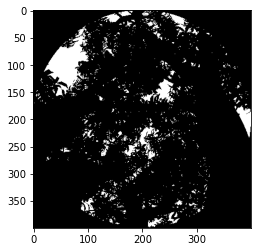

In [399]:
#img = generate(True_structure, camheight = 120, debug=True)
#imshow(img)

In [400]:
#gf = gap_fraction(True_structure, camheight = 120)
#print(gf)

0.10436360164231834


In [76]:
import regrowth; reload(regrowth)
from regrowth import *
import regrowth_base; reload(regrowth_base)
from regrowth_base import *

In [77]:
regrowth, newids = growth(pruned, Zeta_mean)

Should examine 2781 terminal GUs.
Processed 300 pruned terminal GU and 2446 unpruned terminal GU and  35 ignored.


In [78]:
[regrowth.property('NbLeaf').get(vid) for vid in newids]

[6,
 8,
 9,
 8,
 5,
 4,
 9,
 10,
 9,
 6,
 11,
 7,
 6,
 8,
 6,
 9,
 11,
 15,
 11,
 14,
 11,
 11,
 6,
 3,
 10,
 11,
 6,
 9,
 9,
 12,
 7,
 10,
 7,
 13,
 13,
 12,
 12,
 11,
 13,
 4,
 15,
 10,
 11,
 7,
 6,
 8,
 8,
 8,
 8,
 2,
 7,
 5,
 10,
 8,
 9,
 8,
 8,
 6,
 11,
 16,
 12,
 16,
 8,
 6,
 11,
 8,
 6,
 4,
 11,
 10,
 6,
 9,
 8,
 5,
 2,
 1,
 10,
 10,
 5,
 7,
 7,
 8,
 5,
 10,
 7,
 8,
 4,
 15,
 12,
 8,
 5,
 9,
 4,
 8,
 5,
 8,
 10,
 10,
 2,
 6,
 7,
 10,
 9,
 5,
 13,
 7,
 5,
 4,
 9,
 8,
 10,
 11,
 9,
 8,
 6,
 10,
 16,
 15,
 11,
 13,
 17,
 14,
 13,
 14,
 17,
 17,
 14,
 13,
 14,
 17,
 11,
 12,
 5,
 11,
 12,
 6,
 10,
 5,
 11,
 10,
 8,
 14,
 17,
 12,
 15,
 16,
 15,
 11,
 14,
 6,
 8,
 7,
 9,
 10,
 5,
 5,
 7,
 9,
 3,
 12,
 6,
 12,
 12,
 12,
 4,
 5,
 9,
 10,
 4,
 7,
 5,
 10,
 6,
 8,
 5,
 7,
 9,
 9,
 9,
 10,
 16,
 7,
 13,
 7,
 6,
 14,
 10,
 5,
 7,
 15,
 8,
 11,
 9,
 9,
 8,
 6,
 7,
 6,
 10,
 11,
 6,
 8,
 11,
 9,
 11,
 9,
 9,
 11,
 7,
 6,
 8,
 11,
 7,
 6,
 8,
 8,
 12,
 4,
 10,
 9,
 11,
 6,
 14,
 5,
 11,
 2,
 

In [79]:
print('Created', len(newids), 'new GUs')
plot_growth(regrowth, leaves=True, gc=True)

Created 2292 new GUs


SceneWidget(scenes=[{'id': 'xawF01quZHCN5xQcoVChRndV5', 'data': b'x\xda\xdc\xbd\x07x\x15U\xd76\x1c\xaa\x10z\xe…

In [66]:
terminals = get_all_terminal_gus(regrowth_MAJ)

NameError: name 'regrowth_MAJ' is not defined

In [407]:
#def DeathOccurency_GUf_unpruned_2022(ToT_GUf):
#    intercept = - 7.641
#    linear = intercept + 1.503 * ToT_GUf
#    probavalue = exp(linear)/(1+exp(linear))

#    return binomial_realization(probavalue)

#def DeathOccurency_GUf_pruned_2022(ToT_GUf):
#    intercept = - 2.362
#    linear = intercept + 0.473 * ToT_GUf
#    probavalue = exp(linear)/(1+exp(linear))

#    return binomial_realization(probavalue)  

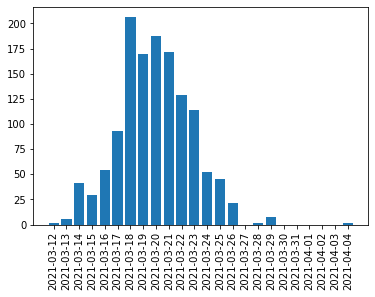

In [22]:
def date_histo(g):
    from matplotlib.pyplot import hist, show
    from collections import Counter
    from datetime import timedelta
    c = list(Counter(g.property('BurstDate').values()).items())
    c.sort(key = lambda v : v[0])
    mindate = c[0][0]
    maxdate = c[-1][0]
    c = dict(c)
    r = range(0,(maxdate-mindate).days)
    d = [mindate+timedelta(days=d) for d in r]
    v = [ c.get(di,0) for di in d]
    bar(r,v)
    xticks(r,d, rotation=90)
    show()
    
date_histo(regrowth_MAJ)  

2826 (0.4734607218683652, 1.2557735812563915) (2.486988847583643, 1.8099317707431715) (0, 11)


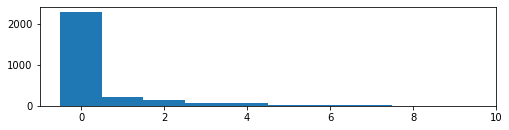

In [23]:
def nb_children_histo(g):
    def severity(vid):
        return g.property('cuted').get(vid,0)

    ancestors = [get_parent(g,vid) if vid in g.property('BurstDate') else vid for vid in get_all_terminal_gus(g) ]
    ancestors = set(ancestors)
    
    values = [[] for i in range(4)]
    for vid in ancestors:
        values[severity(vid)].append(g.nb_children(vid))
    figure(figsize=(18,4))
    for order, v in enumerate(values):
        if len(v) > 0:
            subplot(220+order+1)
            hist(v, bins=np.arange(0,max(1,max(v)))-0.5)
            print(len(v),(np.mean(v), np.std(v)),(np.mean([vi for vi in v if vi > 0]), np.std([vi for vi in v if vi > 0])),(np.min(v), np.max(v)))
    show()
    
nb_children_histo(regrowth_MAJ)  

In [367]:
def DeathOccurency_GUf_unpruned_2022(ToT_GUf):
    intercept = - 7.641
    linear = intercept + 1.503 * ToT_GUf
    probavalue = exp(linear)/(1+exp(linear))

    return binomial_realization(probavalue)

def DeathOccurency_GUf_pruned_2022(ToT_GUf):
    intercept = - 2.362
    linear = intercept + 0.473 * ToT_GUf
    probavalue = exp(linear)/(1+exp(linear))

    return binomial_realization(probavalue)

In [24]:
import gapfraction ; reload(gapfraction)
from gapfraction import gapfraction_dynamic

In [218]:
gft = gapfraction_dynamic(regrowth_MAJ) 

D:\V_mango\virtualpruning\notebooks\mtgplot.py:256: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if burstdate and burstdate > todate: return


In [219]:
pruningdate = date(2021,2,24)

In [220]:
import gapfraction; reload(gapfraction)
from gapfraction import *

gf0 = gap_fraction(g, camheight=120)
print(gf0)

0.10531843788790222


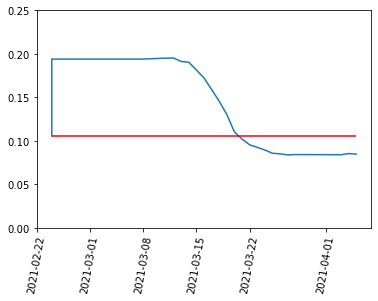

In [221]:
from matplotlib.pyplot import *
plot([pruningdate,pruningdate]+[d for d,g in gft],[gf0,gft[0][1]]+[g for d,g in gft])
hlines(gf0,pruningdate,gft[-1][0],color='r')
ylim(0,0.25)
xticks(rotation = 80)
show()

In [368]:
import exportinfo; reload(exportinfo)
from exportinfo import *

In [369]:
extend_mtg_with_characteristic(regrowth_MAJ)

In [370]:
TrPPFD, Zeta = daily_light_variables(regrowth_MAJ)

In [371]:
extend_mtg_with_light(regrowth_MAJ,TrPPFD, Zeta)

In [372]:
pd = export_as_dataframe(regrowth_MAJ)

In [373]:
pd.to_csv('Structure_T0_mortalite.csv')